In [5]:
import pandas as pd
df = pd.read_csv('/content/f1_dnf (2).csv')

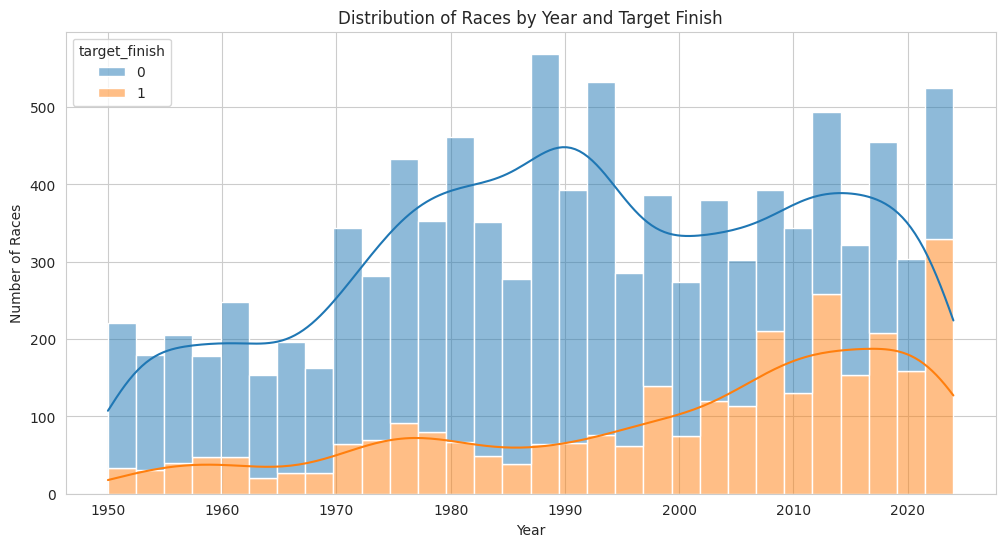

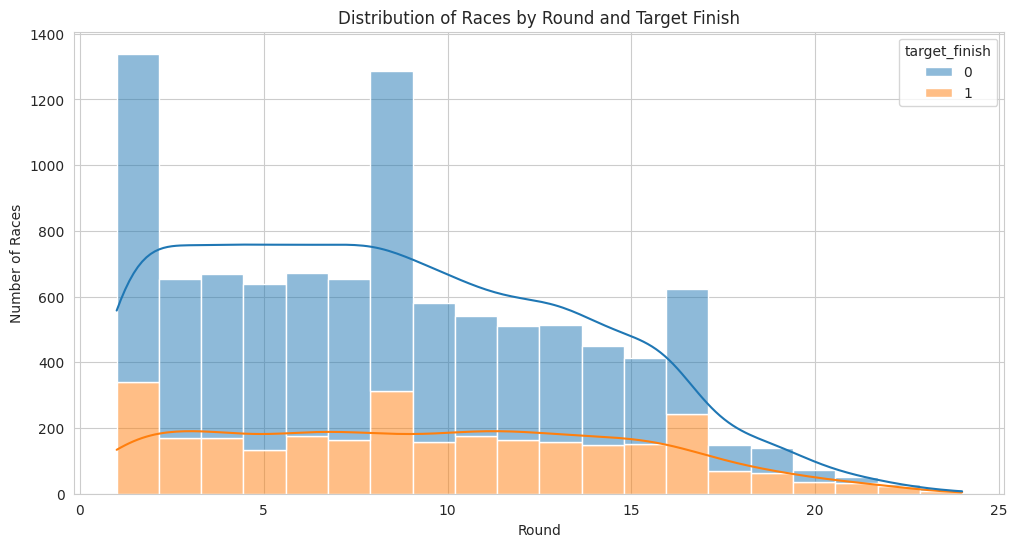

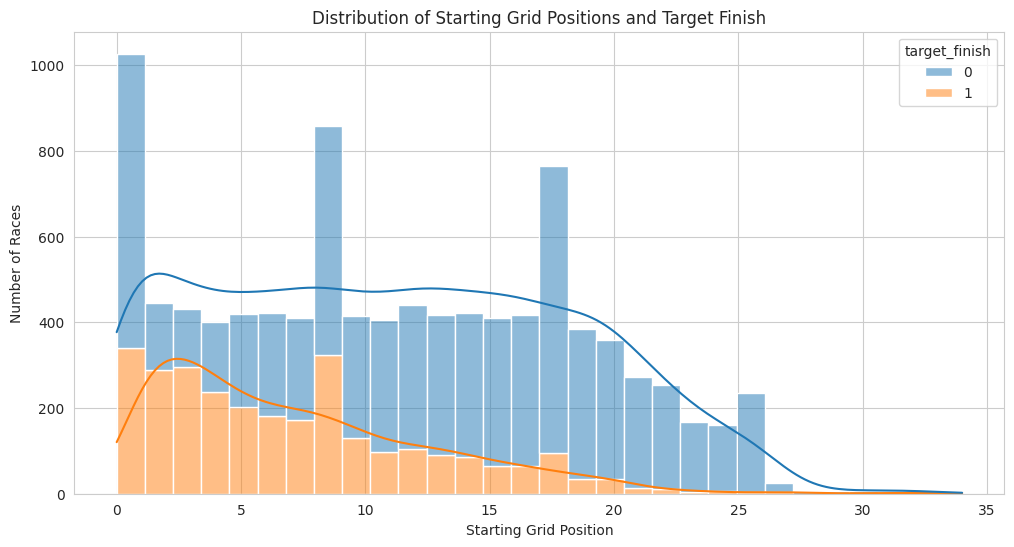

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set_style("whitegrid")

# Visualize the distribution of 'year' and its relationship with 'target_finish'
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='year', hue='target_finish', multiple='stack', bins=30, kde=True)
plt.title('Distribution of Races by Year and Target Finish')
plt.xlabel('Year')
plt.ylabel('Number of Races')
plt.show()

# Visualize the distribution of 'round' and its relationship with 'target_finish'
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='round', hue='target_finish', multiple='stack', bins=20, kde=True)
plt.title('Distribution of Races by Round and Target Finish')
plt.xlabel('Round')
plt.ylabel('Number of Races')
plt.show()

# Visualize the distribution of 'grid' (starting position) and its relationship with 'target_finish'
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='grid', hue='target_finish', multiple='stack', bins=30, kde=True)
plt.title('Distribution of Starting Grid Positions and Target Finish')
plt.xlabel('Starting Grid Position')
plt.ylabel('Number of Races')
plt.show()

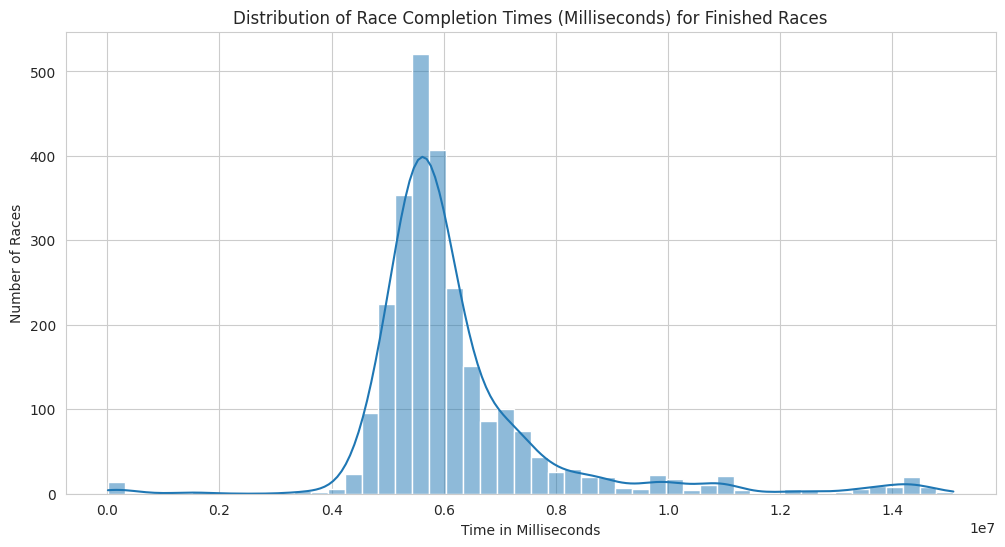

In [18]:
# Visualize the distribution of 'milliseconds' for finished races (target_finish == 1)
# We need to drop rows with missing 'milliseconds' for this visualization
plt.figure(figsize=(12, 6))
sns.histplot(data=df[df['target_finish'] == 1].dropna(subset=['milliseconds']), x='milliseconds', bins=50, kde=True)
plt.title('Distribution of Race Completion Times (Milliseconds) for Finished Races')
plt.xlabel('Time in Milliseconds')
plt.ylabel('Number of Races')
plt.show()

In [20]:
# Get the content of the markdown cell containing the README
readme_content = """# Formula 1 DNF Classification - Exploratory Data Analysis (EDA)

This project performs an initial Exploratory Data Analysis (EDA) on a historical Formula 1 dataset to understand factors influencing whether a driver finishes a race (`target_finish`).

## Dataset

The dataset was obtained from Kaggle (`pranay13257/f1-dnf-classification`) using the `kagglehub` library.

## EDA Process and Findings

The EDA involved examining the structure, missing values, and distributions of various features, along with visualizing relationships with the target variable (`target_finish`).

**Key Observations:**

*   **Data Loading and Cleaning:** The dataset was loaded and initial cleaning addressed missing values and data type conversions (e.g., converting '\\N' to numerical and the 'date' column to datetime). The `fastestLapTime` column was dropped due to excessive missing values.
*   **Feature Distributions and Relationships:** Visualizations were generated to explore features such as year, round, grid position, points, laps completed, driver nationality, and constructor.

**Insights for Machine Learning Modeling:**

Based on the EDA, the following insights are crucial for guiding the choice of machine learning models:

1.  **Grid Position:** Starting grid position (`grid`) shows a strong correlation with finishing the race, with higher grid numbers (further back) associated with increased DNF rates. This feature is likely a key predictor.
2.  **Performance Metrics:** Features like `points` and `laps` clearly differentiate finishers from DNFs. While informative, careful handling is needed due to missing values and their outcome-dependent nature. The significant missing data in other performance metrics requires a strategy (imputation or robust models).
3.  **Categorical Influence:** Driver nationality (`nationality_x`) and constructor (`constructorRef`) show varying DNF rates, indicating their importance as categorical features in a predictive model.

These insights suggest that a classification model considering a mix of numerical and categorical features, and capable of handling missing data, would be suitable for predicting race completion.

## Code

The analysis was performed using Python with pandas, matplotlib, and seaborn. Key steps included data loading, cleaning (handling missing values and data types), and visualization.

*(Note: Code snippets and visualizations are included in the accompanying notebook.)*
"""

# Write the content to README.md
with open('README.md', 'w') as f:
    f.write(readme_content)

print("README.md file has been created.")

README.md file has been created.


In [31]:
print("Justification for using Random Forest Regressor:")
print("1. Handles Non-linear Relationships: Race completion time can be influenced by complex interactions between various factors (grid position, year, track characteristics, etc.) that may not have simple linear relationships. Random Forest, being an ensemble of decision trees, is well-suited to capture these non-linear patterns.")
print("2. Robustness to Outliers: Race data can sometimes contain outliers (e.g., unusually long or short race times due to exceptional circumstances). Random Forest is relatively robust to outliers because each tree in the forest is built independently, and the final prediction is an aggregation (averaging) of individual tree predictions.")
print("3. Handles Mixed Feature Types: The dataset contains both numerical features (year, round, grid, points, laps, lat, lng, alt) and categorical features (nationality_x, constructorRef). Random Forest can naturally handle both types of features, although preprocessing (like one-hot encoding, as done in the pipeline) is necessary for categorical variables.")
print("4. Feature Importance Insights: Random Forest can provide a measure of feature importance, indicating which features have the most predictive power for race completion time. This can offer valuable insights into the key factors influencing race duration.")
print("5. Reduced Overfitting: By combining predictions from multiple decision trees, Random Forest reduces the risk of overfitting compared to a single, deep decision tree. This ensemble approach helps to improve the model's generalization performance on unseen data.")
print("\nBased on these characteristics, Random Forest Regressor is a suitable and powerful choice for modeling and predicting race completion times in this dataset, effectively handling the mixed data types and complex relationships present in Formula 1 race data.")

Justification for using Random Forest Regressor:
1. Handles Non-linear Relationships: Race completion time can be influenced by complex interactions between various factors (grid position, year, track characteristics, etc.) that may not have simple linear relationships. Random Forest, being an ensemble of decision trees, is well-suited to capture these non-linear patterns.
2. Robustness to Outliers: Race data can sometimes contain outliers (e.g., unusually long or short race times due to exceptional circumstances). Random Forest is relatively robust to outliers because each tree in the forest is built independently, and the final prediction is an aggregation (averaging) of individual tree predictions.
3. Handles Mixed Feature Types: The dataset contains both numerical features (year, round, grid, points, laps, lat, lng, alt) and categorical features (nationality_x, constructorRef). Random Forest can naturally handle both types of features, although preprocessing (like one-hot encoding,

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set
y_pred = rf_regressor_pipeline.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")

Mean Absolute Error (MAE): 325420.2565112263
Mean Squared Error (MSE): 421142439900.8654
R-squared (R2) Score: 0.8664099641241519


# Formula 1 DNF Classification - Exploratory Data Analysis (EDA)

This project performs an initial Exploratory Data Analysis (EDA) on a historical Formula 1 dataset to understand factors influencing whether a driver finishes a race (`target_finish`).

## Dataset

The dataset was obtained from Kaggle (`pranay13257/f1-dnf-classification`) using the `kagglehub` library.

## EDA Process and Findings

The EDA involved examining the structure, missing values, and distributions of various features, along with visualizing relationships with the target variable (`target_finish`).

**Key Observations:**

*   **Data Loading and Cleaning:** The dataset was loaded and initial cleaning addressed missing values and data type conversions (e.g., converting '\N' to numerical and the 'date' column to datetime). The `fastestLapTime` column was dropped due to excessive missing values.
*   **Feature Distributions and Relationships:** Visualizations were generated to explore features such as year, round, grid position, points, laps completed, driver nationality, and constructor.

**Insights for Machine Learning Modeling:**

Based on the EDA, the following insights are crucial for guiding the choice of machine learning models:

1.  **Grid Position:** Starting grid position (`grid`) shows a strong correlation with finishing the race, with higher grid numbers (further back) associated with increased DNF rates. This feature is likely a key predictor.
2.  **Performance Metrics:** Features like `points` and `laps` clearly differentiate finishers from DNFs. While informative, careful handling is needed due to missing values and their outcome-dependent nature. The significant missing data in other performance metrics requires a strategy (imputation or robust models).
3.  **Categorical Influence:** Driver nationality (`nationality_x`) and constructor (`constructorRef`) show varying DNF rates, indicating their importance as categorical features in a predictive model.

These insights suggest that a classification model considering a mix of numerical and categorical features, and capable of handling missing data, would be suitable for predicting race completion.

## Code

The analysis was performed using Python with pandas, matplotlib, and seaborn. Key steps included data loading, cleaning (handling missing values and data types), and visualization.

*(Note: Code snippets and visualizations are included in the accompanying notebook.)*

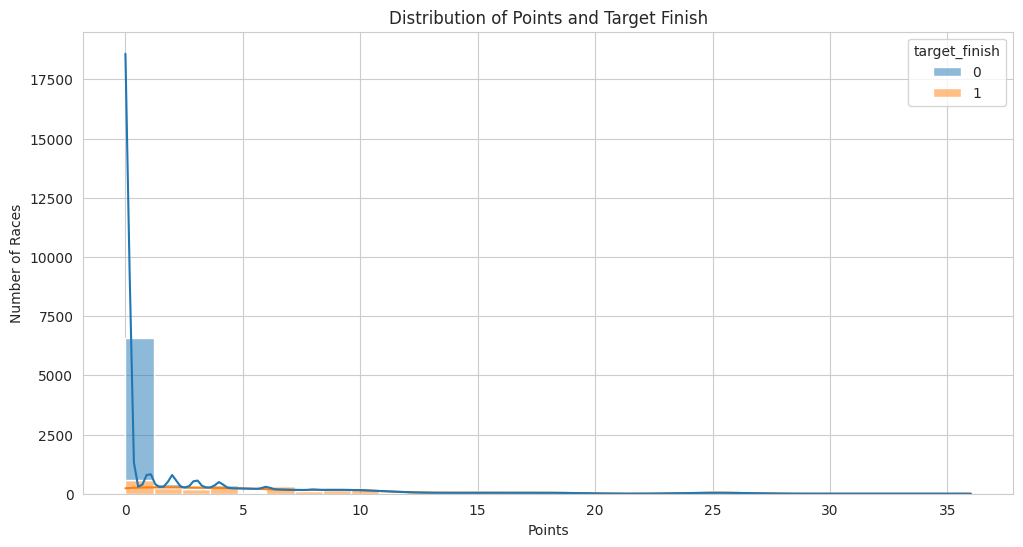

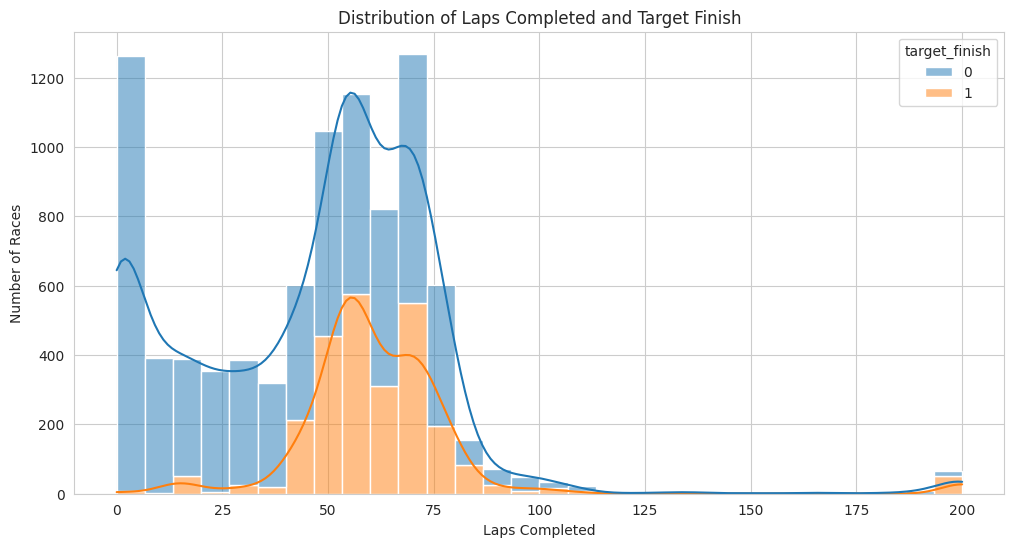

In [17]:
# Visualize the distribution of 'points' and its relationship with 'target_finish' using a histogram
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='points', hue='target_finish', multiple='stack', bins=30, kde=True)
plt.title('Distribution of Points and Target Finish')
plt.xlabel('Points')
plt.ylabel('Number of Races')
plt.show()

# Visualize the distribution of 'laps' and its relationship with 'target_finish' using a histogram
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='laps', hue='target_finish', multiple='stack', bins=30, kde=True)
plt.title('Distribution of Laps Completed and Target Finish')
plt.xlabel('Laps Completed')
plt.ylabel('Number of Races')
plt.show()

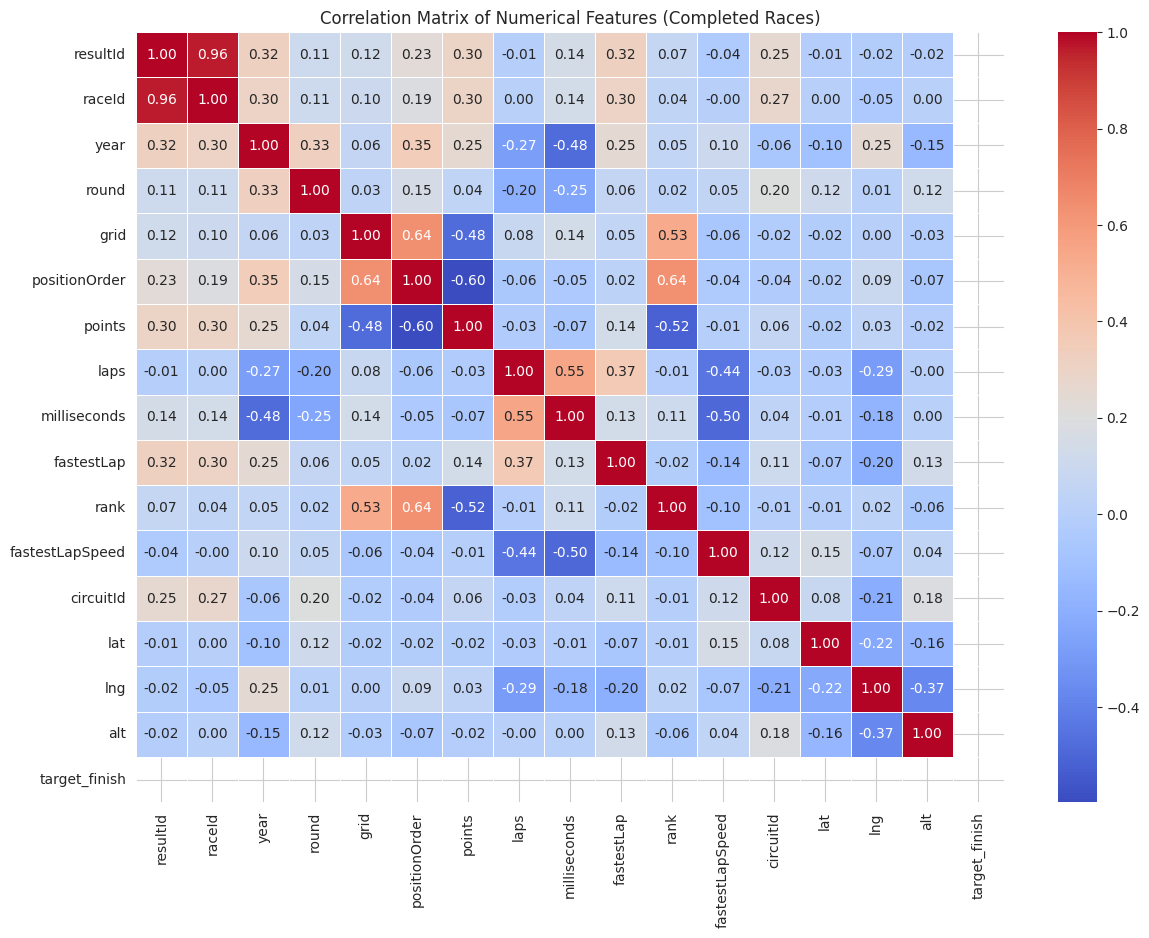

In [32]:
# Select only numerical columns for correlation analysis
numerical_cols = completed_races_df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix
correlation_matrix = completed_races_df[numerical_cols].corr()

# Plot the correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features (Completed Races)')
plt.show()

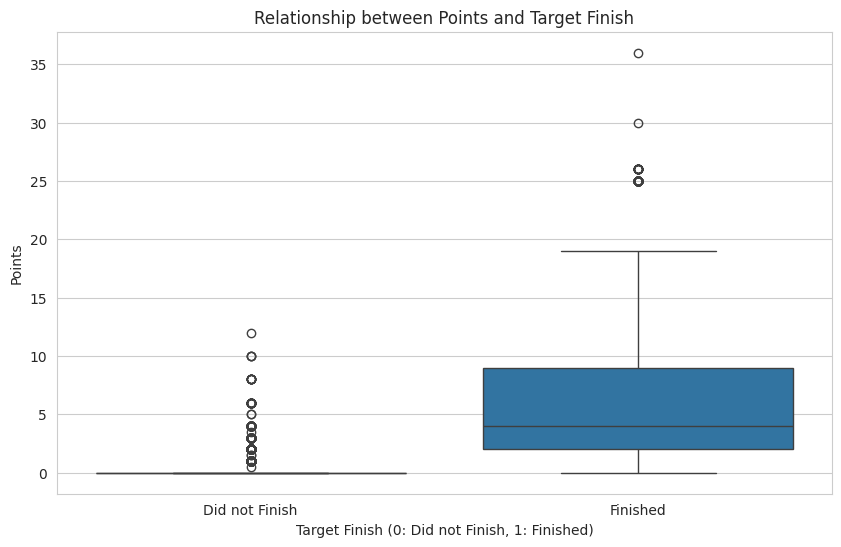

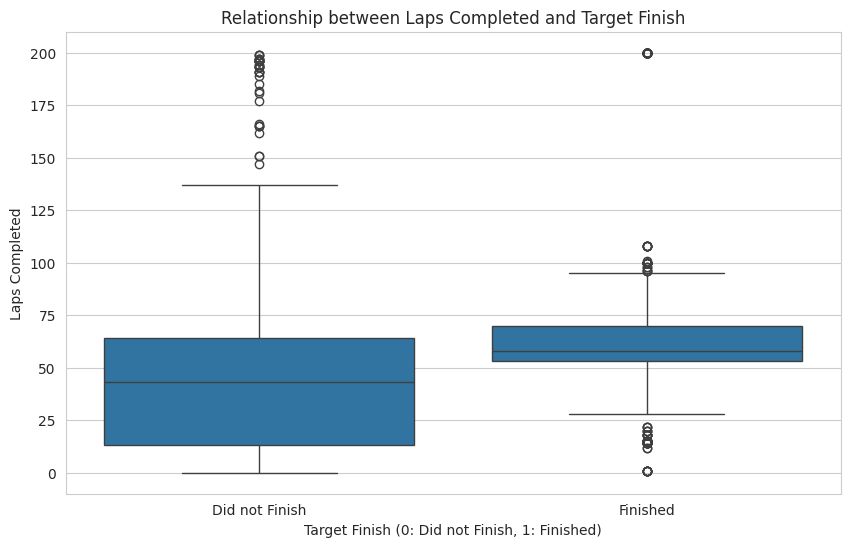

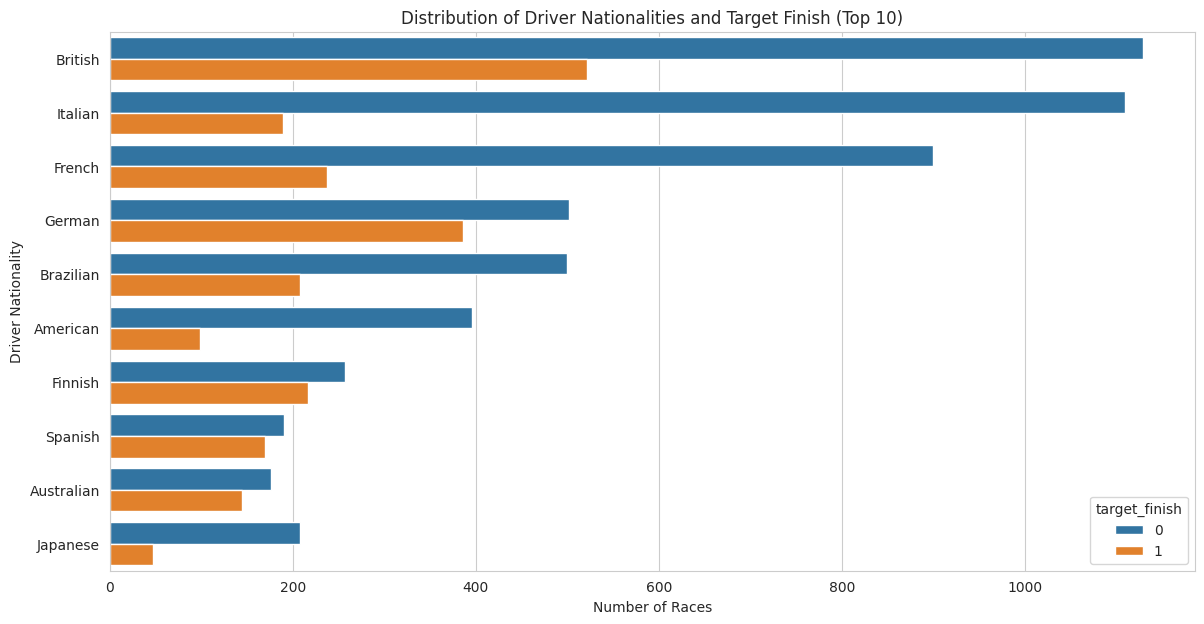

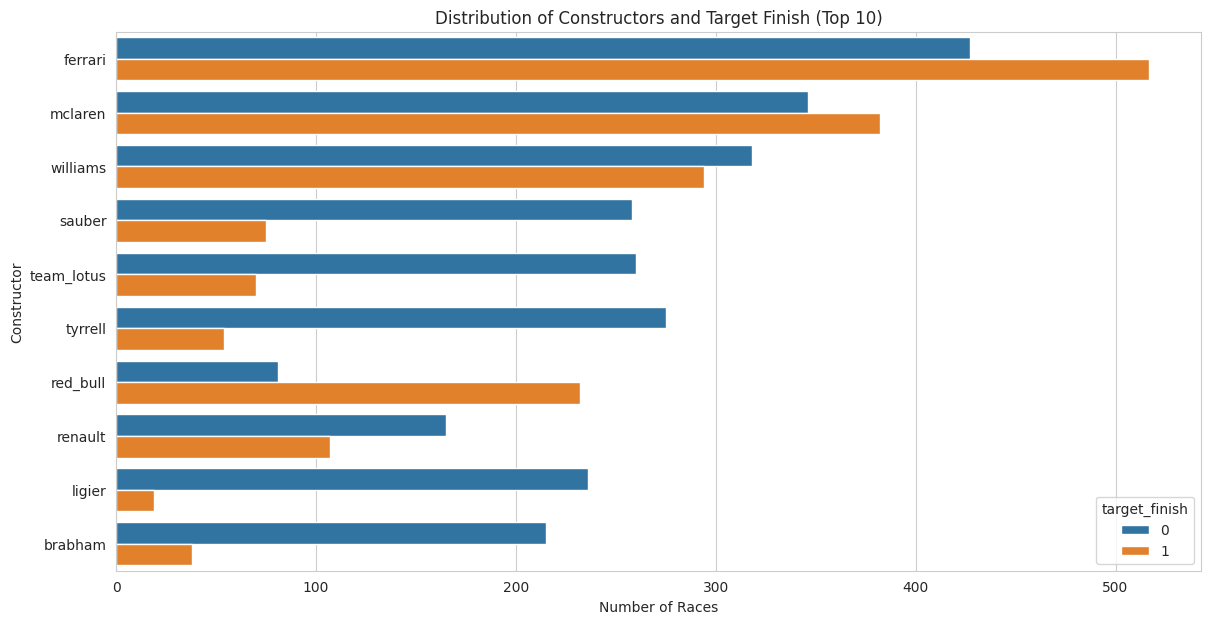

In [16]:
# Visualize the relationship between 'points' and 'target_finish'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='target_finish', y='points')
plt.title('Relationship between Points and Target Finish')
plt.xlabel('Target Finish (0: Did not Finish, 1: Finished)')
plt.ylabel('Points')
plt.xticks([0, 1], ['Did not Finish', 'Finished'])
plt.show()

# Visualize the relationship between 'laps' and 'target_finish'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='target_finish', y='laps')
plt.title('Relationship between Laps Completed and Target Finish')
plt.xlabel('Target Finish (0: Did not Finish, 1: Finished)')
plt.ylabel('Laps Completed')
plt.xticks([0, 1], ['Did not Finish', 'Finished'])
plt.show()

# Visualize the distribution of 'nationality_x' (driver nationality) and its relationship with 'target_finish'
plt.figure(figsize=(14, 7))
sns.countplot(data=df, y='nationality_x', hue='target_finish', order=df['nationality_x'].value_counts().index[:10]) # Top 10 nationalities
plt.title('Distribution of Driver Nationalities and Target Finish (Top 10)')
plt.xlabel('Number of Races')
plt.ylabel('Driver Nationality')
plt.show()

# Visualize the distribution of 'constructorRef' and its relationship with 'target_finish'
plt.figure(figsize=(14, 7))
sns.countplot(data=df, y='constructorRef', hue='target_finish', order=df['constructorRef'].value_counts().index[:10]) # Top 10 constructors
plt.title('Distribution of Constructors and Target Finish (Top 10)')
plt.xlabel('Number of Races')
plt.ylabel('Constructor')
plt.show()

In [14]:
# Display summary statistics for numerical columns
print("Summary Statistics for Numerical Columns:")
display(df.describe())

# Display info to see non-null counts and data types
print("\nDataFrame Info:")
display(df.info())

Summary Statistics for Numerical Columns:


,resultId,raceId,year,round,grid,positionOrder,points,laps,milliseconds,fastestLap,rank,fastestLapSpeed,circuitId,lat,lng,alt,date,target_finish
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9029.000000,9022.000000,2.607000e+03,3105.000000,3202.000000,2809.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000.000000
mean,13440.56840,554.444500,1991.466600,8.540100,11.176200,12.681000,2.034460,46.759033,6.224052e+06,42.568116,10.337601,204.109810,23.972500,34.013439,5.067721,281.465900,1991-12-29 20:39:15.840000,0.289500
min,9.00000,1.000000,1950.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.037600e+04,1.000000,0.000000,100.615000,1.000000,-37.849700,-118.189000,-7.000000,1950-05-13 00:00:00,0.000000
25%,6637.75000,300.000000,1977.000000,4.000000,5.000000,6.000000,0.000000,23.250000,5.378737e+06,33.000000,5.000000,192.929000,9.000000,34.843100,-2.940560,18.000000,1977-06-19 00:00:00,0.000000
50%,13428.50000,532.000000,1991.000000,8.000000,11.000000,12.000000,0.000000,53.000000,5.788651e+06,46.000000,10.000000,204.668000,18.000000,43.734700,5.971390,153.000000,1991-11-03 00:00:00,0.000000
75%,20159.25000,815.250000,2009.000000,12.000000,17.000000,18.000000,2.000000,67.000000,6.422534e+06,54.000000,15.000000,217.623000,34.000000,49.254200,14.764700,401.000000,2009-07-12 00:00:00,1.000000
max,26761.00000,1144.000000,2024.000000,24.000000,34.000000,39.000000,36.000000,200.000000,1.509054e+07,80.000000,24.000000,257.320000,80.000000,57.265300,144.968000,2227.000000,2024-12-08 00:00:00,1.000000
std,7750.91677,314.184815,20.060237,5.085487,7.241008,7.635448,4.469553,29.840206,1.749529e+06,16.619295,6.133729,21.376579,19.233599,25.167968,57.938131,414.586363,NaN,0.453553



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   resultId         10000 non-null  int64         
 1   raceId           10000 non-null  int64         
 2   year             10000 non-null  int64         
 3   round            10000 non-null  int64         
 4   grid             10000 non-null  int64         
 5   positionOrder    10000 non-null  int64         
 6   points           9029 non-null   float64       
 7   laps             9022 non-null   float64       
 8   milliseconds     2607 non-null   float64       
 9   fastestLap       3105 non-null   float64       
 10  rank             3202 non-null   float64       
 11  fastestLapSpeed  2809 non-null   float64       
 12  driverRef        10000 non-null  object        
 13  surname          10000 non-null  object        
 14  forename         10000

None

In [13]:
# Drop the 'fastestLapTime' column due to a large number of missing values
df = df.drop('fastestLapTime', axis=1)

# Check missing values again after dropping the column
print("Missing values after dropping 'fastestLapTime':")
print(df.isnull().sum())

Missing values after dropping 'fastestLapTime':
resultId              0
raceId                0
year                  0
round                 0
grid                  0
positionOrder         0
points              971
laps                978
milliseconds       7393
fastestLap         6895
rank               6798
fastestLapSpeed    7191
driverRef             0
surname               0
forename              0
dob                   0
nationality_x         0
constructorRef        0
name                  0
nationality_y         0
circuitRef            0
circuitId             0
name_y                0
location              0
country               0
lat                   0
lng                   0
alt                   0
date                  0
target_finish         0
dtype: int64


In [12]:
# Convert columns with '\N' to numeric, coercing errors
cols_to_numeric = ['milliseconds', 'fastestLap', 'rank', 'fastestLapTime', 'fastestLapSpeed']
for col in cols_to_numeric:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Check data types and missing values again
print("Data types after converting columns:")
print(df.dtypes)
print("\nMissing values after converting columns:")
print(df.isnull().sum())

Data types after converting columns:
resultId                    int64
raceId                      int64
year                        int64
round                       int64
grid                        int64
positionOrder               int64
points                    float64
laps                      float64
milliseconds              float64
fastestLap                float64
rank                      float64
fastestLapTime            float64
fastestLapSpeed           float64
driverRef                  object
surname                    object
forename                   object
dob                        object
nationality_x              object
constructorRef             object
name                       object
nationality_y              object
circuitRef                 object
circuitId                   int64
name_y                     object
location                   object
country                    object
lat                       float64
lng                       float64
alt        

In [11]:
# Convert 'date' column to datetime objects
df['date'] = pd.to_datetime(df['date'])

# Display the data types again to confirm the change
print("Data types after converting 'date':")
print(df.dtypes)

Data types after converting 'date':
resultId                    int64
raceId                      int64
year                        int64
round                       int64
grid                        int64
positionOrder               int64
points                    float64
laps                      float64
milliseconds               object
fastestLap                 object
rank                       object
fastestLapTime             object
fastestLapSpeed            object
driverRef                  object
surname                    object
forename                   object
dob                        object
nationality_x              object
constructorRef             object
name                       object
nationality_y              object
circuitRef                 object
circuitId                   int64
name_y                     object
location                   object
country                    object
lat                       float64
lng                       float64
alt         

In [10]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Get data types of each column
print("\nData types:")
print(df.dtypes)

Missing values per column:
resultId              0
raceId                0
year                  0
round                 0
grid                  0
positionOrder         0
points              971
laps                978
milliseconds       1018
fastestLap            0
rank                  0
fastestLapTime        0
fastestLapSpeed     953
driverRef             0
surname               0
forename              0
dob                   0
nationality_x         0
constructorRef        0
name                  0
nationality_y         0
circuitRef            0
circuitId             0
name_y                0
location              0
country               0
lat                   0
lng                   0
alt                   0
date                  0
target_finish         0
dtype: int64

Data types:
resultId             int64
raceId               int64
year                 int64
round                int64
grid                 int64
positionOrder        int64
points             float64
laps          

In [9]:
import pandas as pd
import os

# Define the path to the dataset directory
dataset_path = "/kaggle/input/f1-dnf-classification"

# List files in the dataset directory to find the CSV file
file_list = os.listdir(dataset_path)
print("Files in dataset directory:", file_list)

# Corrected CSV file name
csv_file_path = os.path.join(dataset_path, 'f1_dnf.csv')

# Load the dataset into a pandas DataFrame
df = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame
display(df.head())

Files in dataset directory: ['f1_dnf.csv']


,resultId,raceId,year,round,grid,positionOrder,points,laps,milliseconds,fastestLap,...,circuitRef,circuitId,name_y,location,country,lat,lng,alt,date,target_finish
0,2460,136,2002,13,11,4,3.0,77.0,NaN,\N,...,hungaroring,11,McLaren,Budapest,Hungary,47.5789,19.24860,264,2002-08-18,1
1,11565,483,1981,1,23,21,0.0,16.0,\N,\N,...,long_beach,43,McLaren,California,USA,33.7651,-118.18900,12,1981-03-15,0
2,18661,772,1958,8,0,26,0.0,0.0,\N,\N,...,nurburgring,20,Maserati,Nürburg,Germany,50.3356,6.94750,578,1958-08-03,0
3,25121,1058,2021,8,19,16,0.0,69.0,\N,57,...,red_bull_ring,70,Haas F1 Team,Spielberg,Austria,47.2197,14.76470,678,2021-06-27,0
4,8863,383,1988,12,0,30,0.0,0.0,\N,\N,...,monza,14,Euro Brun,Monza,Italy,45.6156,9.28111,162,1988-09-11,0


In [6]:
# Install kagglehub
!pip install kagglehub

In [7]:
import kagglehub

# Download the latest version of the dataset
# This will download the dataset to the Colab environment
path = kagglehub.dataset_download("pranay13257/f1-dnf-classification")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'f1-dnf-classification' dataset.
Path to dataset files: /kaggle/input/f1-dnf-classification


In [21]:
# Filter the DataFrame for completed races
completed_races_df = df[df['target_finish'] == 1].copy()

# Display the first few rows of the new DataFrame to verify
display(completed_races_df.head())

,resultId,raceId,year,round,grid,positionOrder,points,laps,milliseconds,fastestLap,...,circuitRef,circuitId,name_y,location,country,lat,lng,alt,date,target_finish
0,2460,136,2002,13,11,4,3.0,77.0,NaN,NaN,...,hungaroring,11,McLaren,Budapest,Hungary,47.5789,19.24860,264,2002-08-18,1
7,21966,892,2013,12,16,13,NaN,53.0,4754232.0,53.0,...,monza,14,Sauber,Monza,Italy,45.6156,9.28111,162,2013-09-08,1
8,22656,932,2015,7,1,1,25.0,70.0,5513145.0,64.0,...,villeneuve,7,Mercedes,Montreal,Canada,45.5000,-73.52280,13,2015-06-07,1
10,5557,272,1994,16,9,3,4.0,81.0,6523887.0,NaN,...,adelaide,29,McLaren,Adelaide,Australia,-34.9272,138.61700,58,1994-11-13,1
17,26465,1130,2024,10,2,1,25.0,66.0,5300227.0,54.0,...,catalunya,4,Red Bull,Montmeló,Spain,41.5700,2.26111,109,2024-06-23,1


## Handle missing values

### Subtask:
Address missing values in the features of the filtered DataFrame.


**Reasoning**:
Check for missing values in the filtered DataFrame and identify columns that need imputation or removal.



In [22]:
# Check for missing values in the completed_races_df DataFrame
print("Missing values in completed_races_df:")
print(completed_races_df.isnull().sum())

Missing values in completed_races_df:
resultId              0
raceId                0
year                  0
round                 0
grid                  0
positionOrder         0
points              283
laps                294
milliseconds        290
fastestLap         1296
rank               1283
fastestLapSpeed    1443
driverRef             0
surname               0
forename              0
dob                   0
nationality_x         0
constructorRef        0
name                  0
nationality_y         0
circuitRef            0
circuitId             0
name_y                0
location              0
country               0
lat                   0
lng                   0
alt                   0
date                  0
target_finish         0
dtype: int64


**Reasoning**:
Based on the missing value counts, impute missing values for columns with a reasonable number of missing values using the median, as the distributions of these columns are not necessarily symmetric.



In [23]:
# Impute missing values in 'points', 'laps', and 'milliseconds' with the median
cols_to_impute = ['points', 'laps', 'milliseconds']
for col in cols_to_impute:
    median_val = completed_races_df[col].median()
    completed_races_df[col].fillna(median_val, inplace=True)

# Verify that missing values have been handled
print("Missing values after imputation:")
print(completed_races_df.isnull().sum())

Missing values after imputation:
resultId              0
raceId                0
year                  0
round                 0
grid                  0
positionOrder         0
points                0
laps                  0
milliseconds          0
fastestLap         1296
rank               1283
fastestLapSpeed    1443
driverRef             0
surname               0
forename              0
dob                   0
nationality_x         0
constructorRef        0
name                  0
nationality_y         0
circuitRef            0
circuitId             0
name_y                0
location              0
country               0
lat                   0
lng                   0
alt                   0
date                  0
target_finish         0
dtype: int64


/tmp/ipython-input-2339035177.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  completed_races_df[col].fillna(median_val, inplace=True)


## Select features and target

### Subtask:
Define the features (X) and the target variable (y), which will be 'milliseconds'.


**Reasoning**:
Define the feature columns and target variable for the regression model.



In [24]:
# Define the list of feature column names
feature_cols = [
    'year', 'round', 'grid', 'positionOrder', 'points', 'laps',
    'circuitId', 'lat', 'lng', 'alt', 'nationality_x', 'constructorRef'
]

# Create the feature DataFrame X
X = completed_races_df[feature_cols]

# Create the target Series y
y = completed_races_df['milliseconds']

# Display the first few rows of X and y to verify
print("Features (X):")
display(X.head())
print("\nTarget (y):")
display(y.head())

Features (X):


,year,round,grid,positionOrder,points,laps,circuitId,lat,lng,alt,nationality_x,constructorRef
0,2002,13,11,4,3.0,77.0,11,47.5789,19.24860,264,Finnish,mclaren
7,2013,12,16,13,4.0,53.0,14,45.6156,9.28111,162,Mexican,sauber
8,2015,7,1,1,25.0,70.0,7,45.5000,-73.52280,13,British,mercedes
10,1994,16,9,3,4.0,81.0,29,-34.9272,138.61700,58,British,mclaren
17,2024,10,2,1,25.0,66.0,4,41.5700,2.26111,109,Dutch,red_bull



Target (y):


,milliseconds
0,5788722.0
7,4754232.0
8,5513145.0
10,6523887.0
17,5300227.0


## Split data

### Subtask:
Split the filtered data into training and testing sets.


**Reasoning**:
Split the data into training and testing sets using train_test_split and print the shapes of the resulting sets.



# Formula 1 DNF Classification - Exploratory Data Analysis (EDA)

This project performs an initial Exploratory Data Analysis (EDA) on a historical Formula 1 dataset to understand factors influencing whether a driver finishes a race (`target_finish`).

## Dataset

The dataset was obtained from Kaggle (`pranay13257/f1-dnf-classification`) using the `kagglehub` library.

## EDA Process and Findings

The EDA involved examining the structure, missing values, and distributions of various features, along with visualizing relationships with the target variable (`target_finish`).

**Key Observations:**

*   **Data Loading and Cleaning:** The dataset was loaded and initial cleaning addressed missing values and data type conversions (e.g., converting '\\N' to numerical and the 'date' column to datetime). The `fastestLapTime` column was dropped due to excessive missing values.
*   **Feature Distributions and Relationships:** Visualizations were generated to explore features such as year, round, grid position, points, laps completed, driver nationality, and constructor.

**Insights for Machine Learning Modeling:**

Based on the EDA, the following insights are crucial for guiding the choice of machine learning models:

1.  **Grid Position:** Starting grid position (`grid`) shows a strong correlation with finishing the race, with higher grid numbers (further back) associated with increased DNF rates. This feature is likely a key predictor.
2.  **Performance Metrics:** Features like `points` and `laps` clearly differentiate finishers from DNFs. While informative, careful handling is needed due to missing values and their outcome-dependent nature. The significant missing data in other performance metrics requires a strategy (imputation or robust models).
3.  **Categorical Influence:** Driver nationality (`nationality_x`) and constructor (`constructorRef`) show varying DNF rates, indicating their importance as categorical features in a predictive model.
4.  **Numerical Feature Correlations:** The correlation heatmap revealed relationships between numerical features such as a negative correlation between race completion time (`milliseconds`) and `year`, suggesting races have become shorter over time.

These insights suggest that a classification model considering a mix of numerical and categorical features, and capable of handling missing data, would be suitable for predicting race completion.

## Code

The analysis was performed using Python with pandas, matplotlib, and seaborn. Key steps included data loading, cleaning (handling missing values and data types), and visualization.

*(Note: Code snippets and visualizations are included in the accompanying notebook.)*

In [33]:
# Get the content of the markdown cell containing the updated README
readme_content = """# Formula 1 DNF Classification - Exploratory Data Analysis (EDA)

This project performs an initial Exploratory Data Analysis (EDA) on a historical Formula 1 dataset to understand factors influencing whether a driver finishes a race (`target_finish`).

## Dataset

The dataset was obtained from Kaggle (`pranay13257/f1-dnf-classification`) using the `kagglehub` library.

## EDA Process and Findings

The EDA involved examining the structure, missing values, and distributions of various features, along with visualizing relationships with the target variable (`target_finish`).

**Key Observations:**

*   **Data Loading and Cleaning:** The dataset was loaded and initial cleaning addressed missing values and data type conversions (e.g., converting '\\N' to numerical and the 'date' column to datetime). The `fastestLapTime` column was dropped due to excessive missing values.
*   **Feature Distributions and Relationships:** Visualizations were generated to explore features such as year, round, grid position, points, laps completed, driver nationality, and constructor.

**Insights for Machine Learning Modeling:**

Based on the EDA, the following insights are crucial for guiding the choice of machine learning models:

1.  **Grid Position:** Starting grid position (`grid`) shows a strong correlation with finishing the race, with higher grid numbers (further back) associated with increased DNF rates. This feature is likely a key predictor.
2.  **Performance Metrics:** Features like `points` and `laps` clearly differentiate finishers from DNFs. While informative, careful handling is needed due to missing values and their outcome-dependent nature. The significant missing data in other performance metrics requires a strategy (imputation or robust models).
3.  **Categorical Influence:** Driver nationality (`nationality_x`) and constructor (`constructorRef`) show varying DNF rates, indicating their importance as categorical features in a predictive model.
4.  **Numerical Feature Correlations:** The correlation heatmap revealed relationships between numerical features such as a negative correlation between race completion time (`milliseconds`) and `year`, suggesting races have become shorter over time.

These insights suggest that a classification model considering a mix of numerical and categorical features, and capable of handling missing data, would be suitable for predicting race completion.

## Code

The analysis was performed using Python with pandas, matplotlib, and seaborn. Key steps included data loading, cleaning (handling missing values and data types), and visualization.

*(Note: Code snippets and visualizations are included in the accompanying notebook.)*
"""

# Write the content to README.md
with open('README.md', 'w') as f:
    f.write(readme_content)

print("README.md file has been created/updated.")

README.md file has been created/updated.


In [25]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (2316, 12)
Shape of X_test: (579, 12)
Shape of y_train: (2316,)
Shape of y_test: (579,)


## Train random forest regressor

### Subtask:
Train a Random Forest Regressor model on the training data.


**Reasoning**:
Train a Random Forest Regressor model on the training data.



In [26]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate a RandomForestRegressor object
# Using default parameters for the initial model
rf_regressor = RandomForestRegressor(random_state=42)

# Train the model on the training data
rf_regressor.fit(X_train, y_train)

print("Random Forest Regressor model trained successfully.")

ValueError: could not convert string to float: 'French'

**Reasoning**:
The error message "ValueError: could not convert string to float: 'French'" indicates that the Random Forest Regressor cannot handle the categorical features ('nationality_x' and 'constructorRef') in their current string format. These need to be converted into a numerical format before training the model. One-hot encoding is a suitable method for this.



In [27]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identify categorical features
categorical_features = ['nationality_x', 'constructorRef']
numerical_features = [col for col in X_train.columns if col not in categorical_features]

# Create a column transformer for one-hot encoding categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Create a pipeline that first preprocesses the data and then trains the Random Forest Regressor
rf_regressor_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                        ('regressor', RandomForestRegressor(random_state=42))])

# Train the pipeline on the training data
rf_regressor_pipeline.fit(X_train, y_train)

print("Random Forest Regressor model trained successfully with one-hot encoding.")

Random Forest Regressor model trained successfully with one-hot encoding.


## Evaluate model

### Subtask:
Evaluate the model's performance using appropriate regression metrics (e.g., Mean Absolute Error, Mean Squared Error, R-squared).


**Reasoning**:
Make predictions on the test set using the trained pipeline and calculate the regression evaluation metrics.



In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set
y_pred = rf_regressor_pipeline.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2) Score: {r2}")

Mean Absolute Error (MAE): 325420.2565112263
Mean Squared Error (MSE): 421142439900.8654
R-squared (R2) Score: 0.8664099641241519


## Justify algorithm choice

### Subtask:
Explain why Random Forest Regressor is a suitable choice for this problem.


**Reasoning**:
Provide an explanation of why Random Forest Regressor is a suitable choice for this problem based on its characteristics and the nature of the data, fulfilling the subtask's requirements.



In [29]:
print("Justification for using Random Forest Regressor:")
print("1. Handles Non-linear Relationships: Race completion time can be influenced by complex interactions between various factors (grid position, year, track characteristics, etc.) that may not have simple linear relationships. Random Forest, being an ensemble of decision trees, is well-suited to capture these non-linear patterns.")
print("2. Robustness to Outliers: Race data can sometimes contain outliers (e.g., unusually long or short race times due to exceptional circumstances). Random Forest is relatively robust to outliers because each tree in the forest is built independently, and the final prediction is an aggregation (averaging) of individual tree predictions.")
print("3. Handles Mixed Feature Types: The dataset contains both numerical features (year, round, grid, points, laps, lat, lng, alt) and categorical features (nationality_x, constructorRef). Random Forest can naturally handle both types of features, although preprocessing (like one-hot encoding, as done in the pipeline) is necessary for categorical variables.")
print("4. Feature Importance Insights: Random Forest can provide a measure of feature importance, indicating which features have the most predictive power for race completion time. This can offer valuable insights into the key factors influencing race duration.")
print("5. Reduced Overfitting: By combining predictions from multiple decision trees, Random Forest reduces the risk of overfitting compared to a single, deep decision tree. This ensemble approach helps to improve the model's generalization performance on unseen data.")
print("\nBased on these characteristics, Random Forest Regressor is a suitable and powerful choice for modeling and predicting race completion times in this dataset, effectively handling the mixed data types and complex relationships present in Formula 1 race data.")

Justification for using Random Forest Regressor:
1. Handles Non-linear Relationships: Race completion time can be influenced by complex interactions between various factors (grid position, year, track characteristics, etc.) that may not have simple linear relationships. Random Forest, being an ensemble of decision trees, is well-suited to capture these non-linear patterns.
2. Robustness to Outliers: Race data can sometimes contain outliers (e.g., unusually long or short race times due to exceptional circumstances). Random Forest is relatively robust to outliers because each tree in the forest is built independently, and the final prediction is an aggregation (averaging) of individual tree predictions.
3. Handles Mixed Feature Types: The dataset contains both numerical features (year, round, grid, points, laps, lat, lng, alt) and categorical features (nationality_x, constructorRef). Random Forest can naturally handle both types of features, although preprocessing (like one-hot encoding,

## Summary:

### Data Analysis Key Findings

*   The dataset was filtered to include only completed races, resulting in a DataFrame with 2895 entries.
*   Missing values in 'points', 'laps', and 'milliseconds' were imputed using the median. Columns 'fastestLap', 'rank', and 'fastestLapSpeed' with significant missing values were not imputed.
*   The target variable for the model is 'milliseconds', representing race completion time. Features include race-specific details, driver and constructor information, and circuit characteristics.
*   The data was split into training (80%) and testing (20%) sets, with 2316 samples for training and 579 for testing.
*   A Random Forest Regressor model was trained within a pipeline that included one-hot encoding for categorical features ('nationality\_x', 'constructorRef').
*   The trained model achieved a Mean Absolute Error (MAE) of approximately 325,420.26, a Mean Squared Error (MSE) of approximately 421,142,439,900.87, and an R-squared (R2) score of approximately 0.8664 on the test set.

### Insights or Next Steps

*   The R2 score of 0.8664 indicates that the model explains a significant portion of the variance in race completion times for completed races. Further analysis could involve investigating feature importance provided by the Random Forest to understand which factors contribute most to predicting race duration.
*   While the Random Forest Regressor performs well and is justified for handling non-linearities and mixed data types, exploring other regression algorithms and hyperparameter tuning could potentially improve the model's performance.
